In [52]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

### Central limit Theorem

When independent random variables are summed up, their sum tends toward a normal distribution even if the original variables themselves are not normally distributed.

![](17fa70bfc1cbbc6d6476b9f45c9e9d07.jpg)

1. No matter what distribution the population is, if the sample size is over 30, the sameple means approach normal distribution.

2. No matter what distribution the population is, if the sample size is under 30, we can aproximate the sameple means with t-distribution.

3. Given the population is normal distribution, the sample means is normal distribution, even if the sample size is under 30.

4. We use Z-test with proportion data because the standard deviation of a proportion is a function of the proportion itself. Thus, once you have estimated the porportion in your sample, you don't have and extra source of uncertianty that you have to take into account. [See more](https://stats.stackexchange.com/questions/90893/why-use-a-z-test-rather-than-a-t-test-with-proportional-data)


### Question 1: 

___

Suppose the arousal of hot cats has a population that is normally distributed with a standard deviation of 6. Tomorrow you sample 49 hot cats from this population and obtain a mean arousal of 46.44 and a standard deviation of 5.6968.

Using an alpha value of α = 0.01, is this observed mean significantly less than an expected arousal of 47?

#from z_test_tutorial.pdf

In [53]:
std = 6
n = 49
sample_mean = 46.44
sample_std = 5.6968
a = 0.01
mu = 47

H<sub>0 : mu = 47

H<sub>1 : mu < 47

In [54]:
sample_mean_std = std / np.sqrt(n)
z = (sample_mean - mu) / ( sample_mean_std )
p_value = norm.cdf(z)
print("p_value = ", p_value)

p_value =  0.2567707037112666


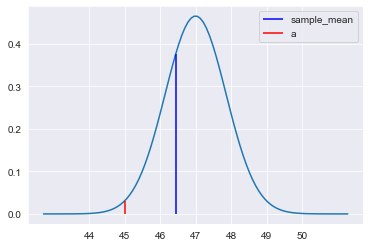

In [55]:
x_a = norm.ppf(a, loc=mu, scale=sample_mean_std)
x = np.linspace(mu - sample_mean_std * 5,
                mu + sample_mean_std * 5,
                num=100)
y = norm.pdf(x, loc=mu, scale=sample_mean_std)
ax = sns.lineplot(x=x, y=y)
plt.xticks([44, 45, 46, 47, 48, 49, 50])
plt.vlines(sample_mean, 0, norm.pdf(sample_mean, loc=mu, scale=sample_mean_std), 'b', label='sample_mean')
plt.vlines(x_a, 0, norm.pdf(x_a, loc=mu, scale=sample_mean_std), 'r', label='a')
plt.legend()

#### Ans:

Since p_value > α, we fail to reject H<sub>0. 

The arousal of hot cats is not significant less than 47. 



### Question 2: 

___

Suppose the jewelry of exams has a population that is normally distributed with a standard deviation of 5. You are walking down the street and sample 9 exams from this
population and obtain a mean jewelry of 28.95 and a standard deviation of 6.3802.

Using an alpha value of α = 0.01, is this observed mean significantly different than an expected jewelry of 27?

#from z_test_tutorial.pdf

In [56]:
mu = 27
std = 5
a = 0.01
n = 9
sample_mean = 28.95
sample_std = 6.3802

H<sub>0 : mu = 27

H<sub>1 : mu $\neq$ 27

In [57]:
sample_mean_std = std / np.sqrt(n)
z = (sample_mean - mu) / sample_mean_std

# The population is normal distribution, 
# so the sample means is normal distribution.
p_value = (1 - norm.cdf(z)) * 2
print("p_value = ", p_value)

p_value =  0.2420009688420368


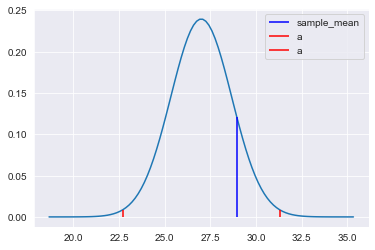

In [76]:
x_a_left = norm.ppf(a/2, loc=mu, scale=sample_mean_std)
x_a_right = norm.ppf(1-a/2, loc=mu, scale=sample_mean_std)
x = np.linspace(mu - sample_mean_std * 5,
                mu + sample_mean_std * 5,
                num=100)
y = norm.pdf(x, loc=mu, scale=sample_mean_std)
ax = sns.lineplot(x=x, y=y)
plt.vlines(sample_mean, 0, norm.pdf(sample_mean, loc=mu, scale=sample_mean_std), 'b', label='sample_mean')
plt.vlines(x_a_left, 0, norm.pdf(x_a_left, loc=mu, scale=sample_mean_std), 'r', label='a')
plt.vlines(x_a_right, 0, norm.pdf(x_a_right, loc=mu, scale=sample_mean_std), 'r', label='a')
plt.legend()

#### Ans:

Since p_value > α, we fail to reject H<sub>0. 

The Jewelry of exams is not significantly different than 27.  

### Example 3: 

___

A company wants to improve the quality of products by reducing defects and monitoring the efficiency of assembly lines. In assembly line A, there were 18 defects reported out of 200 samples while in line B, 25 defects out of 600 samples were noted. 

Is there a difference in the procedures at a 0.05 alpha level?

#from https://www.cuemath.com/data/z-test/

In [59]:
a = 0.05
# The problem can be viewed as sampling data 
# from (P_A - P_B). If A = B, then P_A - P_B = 0
p_a = 18 / 200
p_b = 25 / 600

H<sub>0 : A = B

H<sub>1 : A $\neq$ B

In [70]:
# Since the Null hypothesis states A = B, 
# we use a pooled sample proportion to 
# compute standard error. 
p = (18 + 25) / (200 + 600)
se = np.sqrt(p * (1 - p) * ( 1 / 200 + 1 / 600 ) )

z = ( (p_a - p_b) - 0) / se
p_value = (1 - norm.cdf(z)) * 2
print("p_value = ", p_value)

p_value =  0.008669375420073067
0.018413932677911766
0.04833333333333333


p_a - p_b:  0.04833333333333333
p_alpha_right:  0.0474311473853418


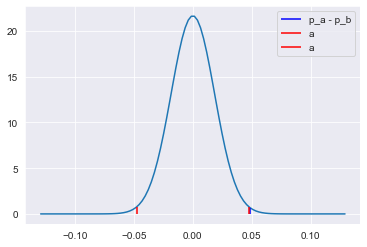

In [78]:
x_a_left = norm.ppf(a/2, loc=0, scale=se)
x_a_right = norm.ppf(1-a/2, loc=0, scale=se)
x = np.linspace(0 - se * 7,
                0 + se * 7,
                num=100)

# Note that the probability density function 
# mesure the density of pobability. As a result,
# the value could be greater than 1.
y = norm.pdf(x, loc=0, scale=se)
ax = sns.lineplot(x=x, y=y)
plt.vlines(p_a - p_b, 0, norm.pdf(p_a-p_b, loc=0, scale=se), 'b', label='p_a - p_b')
plt.vlines(x_a_left, 0, norm.pdf(x_a_left, loc=0, scale=se), 'r', label='a')
plt.vlines(x_a_right, 0, norm.pdf(x_a_right, loc=0, scale=se), 'r', label='a')
plt.legend()

print("p_a - p_b: ", p_a - p_b)
print("p_alpha_right: ", x_a_right)

#### Ans:

Since p_value < α, we rejects H<sub>0

There is a significant difference between two lines.